In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/transactions.csv")

In [3]:
df.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,coupon_id,coupon_discount,promotion_name,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,8.88,NaN,0.0,Sepette %35 İndirim,35.0,0,True,0.0
1,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,129.95,59.97,9.40,NaN,0.0,Sepette %40 İndirim,40.0,0,True,0.0
2,2021-05-01 00:00:01.761000+00:00,3941815,0,157306,901280145,595758968,36888320,65612791,59.99,49.99,10.67,NaN,0.0,NaN,NaN,0,True,0.0
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163856,901280144,595758968,36888399,65613254,49.90,49.90,10.67,NaN,0.0,NaN,NaN,0,True,0.0
4,2021-05-01 00:00:02.742000+00:00,15996105,1,968,901279297,595758987,96930601,161408176,89.99,71.99,9.40,NaN,0.0,Sepette %20 İndirim,20.0,0,False,0.0


In [4]:
df.shape

(11193677, 18)

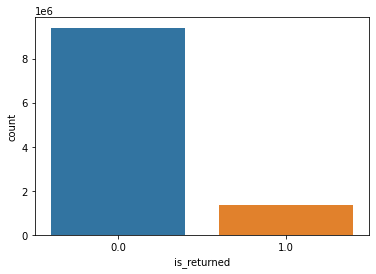

In [7]:
sns.countplot(data=df, x="is_returned");

In [8]:
df.is_returned.value_counts()

0.0    9402321
1.0    1370340
Name: is_returned, dtype: int64

In [10]:
#sns.scatterplot(data=df, x="discounted_price", y="ship_cost", hue="is_returned");

In [11]:
df.isna().sum()

order_date                      0
user_id                         0
is_elite_user                   0
supplier_id                     0
order_line_item_id              0
order_parent_id                 0
product_content_id              0
product_variant_id              0
original_price                  0
discounted_price                0
ship_cost                   36886
coupon_id                10433735
coupon_discount                 0
promotion_name            5653910
promotion_award_value     5653910
is_wallet_trx                   0
is_saved_card_trx               0
is_returned                421016
dtype: int64

In [ ]:
# training period (from 2021-05-01 to 2021-07-31) and test period (from 2021-08-01 to 2021-08-07)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11193677 entries, 0 to 11193676
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_date             object 
 1   user_id                int64  
 2   is_elite_user          int64  
 3   supplier_id            int64  
 4   order_line_item_id     int64  
 5   order_parent_id        int64  
 6   product_content_id     int64  
 7   product_variant_id     int64  
 8   original_price         float64
 9   discounted_price       float64
 10  ship_cost              float64
 11  coupon_id              object 
 12  coupon_discount        float64
 13  promotion_name         object 
 14  promotion_award_value  float64
 15  is_wallet_trx          int64  
 16  is_saved_card_trx      bool   
 17  is_returned            float64
dtypes: bool(1), float64(6), int64(8), object(3)
memory usage: 1.4+ GB


In [13]:
df["order_date"] = pd.to_datetime(df["order_date"])
df.sort_values("order_date", inplace=True)

In [17]:
train = df[df.order_date <= "2021-07-31"]
test = df[df.order_date > "2021-07-31"]

In [18]:
train.shape, test.shape

((10705715, 18), (487962, 18))

In [19]:
#train.to_csv("train.csv", index=False)
#test.to_csv("test.csv", index=False)

In [20]:
train.isna().sum()

order_date                     0
user_id                        0
is_elite_user                  0
supplier_id                    0
order_line_item_id             0
order_parent_id                0
product_content_id             0
product_variant_id             0
original_price                 0
discounted_price               0
ship_cost                  34882
coupon_id                9987178
coupon_discount                0
promotion_name           5423810
promotion_award_value    5423810
is_wallet_trx                  0
is_saved_card_trx              0
is_returned                    0
dtype: int64

In [24]:
train[train.ship_cost.isna()].is_elite_user.value_counts()

0    22615
1    12267
Name: is_elite_user, dtype: int64

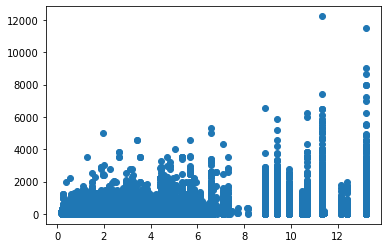

In [26]:
plt.scatter(train[train.is_elite_user == 1].ship_cost, train[train.is_elite_user == 1].original_price)

In [ ]:
#shipping cost'u kim ödüyor

In [28]:
train.ship_cost.min()

0.1776

In [29]:
df.product_content_id.nunique()

705613

In [30]:
df.describe(include=["object"])

,coupon_id,promotion_name
count,759942,5539767
unique,348777,3277
top,79f7a913-f9d3-4736-984e-168d85239c05,Sepette %20 İndirim
freq,50,356580


In [32]:
supplier_return = pd.read_csv("../data/supplier_return.csv")
supplier_return.head()

,supplier_id,returnRate
0,247019,0.0
1,264022,0.0
2,165838,0.0
3,294046,0.0
4,185253,0.0


In [34]:
df = df.merge(supplier_return, on=["supplier_id"])
df

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,coupon_id,coupon_discount,promotion_name,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.9,51.94,8.880000,NaN,0.00,Sepette %35 İndirim,35.0,0,True,0.0,0.098178
1,2021-05-01 00:11:01.908000+00:00,846261,0,4662,901317372,595779437,97027250,161565995,14.9,11.92,4.563941,NaN,0.00,Sepette %20 İndirim,20.0,0,False,0.0,0.098178
2,2021-05-01 00:27:09.965000+00:00,244942,1,4662,901366867,595806906,62212612,108756538,69.9,38.45,8.880000,c365d0d3-e7ca-4c44-9bb5-82790265a680,-6.28,Sepette %45 İndirim,45.0,1,False,0.0,0.098178
3,2021-05-01 00:27:51.300000+00:00,45974971,1,4662,901368497,595807996,79870825,135408496,49.9,32.44,8.880000,NaN,0.00,Sepette %35 İndirim,35.0,1,False,0.0,0.098178
4,2021-05-01 01:10:44.282000+00:00,22708302,1,4662,901478384,595867189,89451047,149564473,129.9,84.44,8.880000,NaN,0.00,Sepette %35 İndirim,35.0,0,True,0.0,0.098178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193635,2021-08-07 23:16:46.148000+00:00,1476077,0,266396,1121211942,729930568,127605007,213391298,299.9,249.90,10.670000,NaN,0.00,NaN,NaN,0,False,NaN,0.283951
11193636,2021-08-07 23:32:55.812000+00:00,43786335,0,418863,1121232536,729944891,123214073,198866350,219.9,169.90,11.330000,NaN,0.00,NaN,NaN,0,True,NaN,0.021053
11193637,2021-08-07 23:39:44.468000+00:00,33168374,0,346230,1121240451,729950697,102763097,169983093,100.0,80.00,NaN,NaN,0.00,NaN,NaN,0,True,NaN,0.000000
11193638,2021-08-07 23:44:18.326000+00:00,18487676,0,109909,1121246380,729954368,39960540,70793143,49.0,24.00,8.880000,NaN,0.00,NaN,NaN,0,True,NaN,0.041194


In [35]:
supplier_disputed_return = pd.read_csv("../data/supplier_disputed_return.csv")
supplier_disputed_return.head()

,supplier_id,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
0,344,164,0,0,0.0
1,263495,332,0,0,0.0
2,193158,670,1,0,0.0
3,146855,86,0,0,0.0
4,225296,43,0,0,0.0


In [36]:
df = df.merge(supplier_disputed_return, on=["supplier_id"])
df

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,promotion_name,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,Sepette %35 İndirim,35.0,0,True,0.0,0.098178,16357,76,25,0.328947
1,2021-05-01 00:11:01.908000+00:00,846261,0,4662,901317372,595779437,97027250,161565995,14.90,11.92,...,Sepette %20 İndirim,20.0,0,False,0.0,0.098178,16357,76,25,0.328947
2,2021-05-01 00:27:09.965000+00:00,244942,1,4662,901366867,595806906,62212612,108756538,69.90,38.45,...,Sepette %45 İndirim,45.0,1,False,0.0,0.098178,16357,76,25,0.328947
3,2021-05-01 00:27:51.300000+00:00,45974971,1,4662,901368497,595807996,79870825,135408496,49.90,32.44,...,Sepette %35 İndirim,35.0,1,False,0.0,0.098178,16357,76,25,0.328947
4,2021-05-01 01:10:44.282000+00:00,22708302,1,4662,901478384,595867189,89451047,149564473,129.90,84.44,...,Sepette %35 İndirim,35.0,0,True,0.0,0.098178,16357,76,25,0.328947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190457,2021-08-07 23:08:15.537000+00:00,40314595,0,121578,1121198687,729922757,33204620,59792208,46.95,46.95,...,NaN,NaN,1,False,NaN,0.021908,105,0,0,0.000000
11190458,2021-08-07 23:16:46.148000+00:00,1476077,0,266396,1121211942,729930568,127605007,213391298,299.90,249.90,...,NaN,NaN,0,False,NaN,0.283951,25,0,0,0.000000
11190459,2021-08-07 23:32:55.812000+00:00,43786335,0,418863,1121232536,729944891,123214073,198866350,219.90,169.90,...,NaN,NaN,0,True,NaN,0.021053,3,0,0,0.000000
11190460,2021-08-07 23:44:18.326000+00:00,18487676,0,109909,1121246380,729954368,39960540,70793143,49.00,24.00,...,NaN,NaN,0,True,NaN,0.041194,421,73,73,1.000000


In [37]:
supplier_defective_return = pd.read_csv("../data/supplier_defective_return.csv")
supplier_defective_return.head()

,supplier_id,returnRate
0,161841,0.0
1,201226,0.0
2,108251,0.0
3,201975,0.0
4,389847,0.0


In [38]:
supplier_defective_return.columns = ["supplier_id", "supplier_defective_return"]
supplier_defective_return.head(3)

,supplier_id,supplier_defective_return
0,161841,0.0
1,201226,0.0
2,108251,0.0


In [39]:
df = df.merge(supplier_defective_return, on=["supplier_id"])
df

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,supplier_defective_return
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,35.0,0,True,0.0,0.098178,16357,76,25,0.328947,0.003045
1,2021-05-01 00:11:01.908000+00:00,846261,0,4662,901317372,595779437,97027250,161565995,14.90,11.92,...,20.0,0,False,0.0,0.098178,16357,76,25,0.328947,0.003045
2,2021-05-01 00:27:09.965000+00:00,244942,1,4662,901366867,595806906,62212612,108756538,69.90,38.45,...,45.0,1,False,0.0,0.098178,16357,76,25,0.328947,0.003045
3,2021-05-01 00:27:51.300000+00:00,45974971,1,4662,901368497,595807996,79870825,135408496,49.90,32.44,...,35.0,1,False,0.0,0.098178,16357,76,25,0.328947,0.003045
4,2021-05-01 01:10:44.282000+00:00,22708302,1,4662,901478384,595867189,89451047,149564473,129.90,84.44,...,35.0,0,True,0.0,0.098178,16357,76,25,0.328947,0.003045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190457,2021-08-07 23:08:15.537000+00:00,40314595,0,121578,1121198687,729922757,33204620,59792208,46.95,46.95,...,NaN,1,False,NaN,0.021908,105,0,0,0.000000,0.001826
11190458,2021-08-07 23:16:46.148000+00:00,1476077,0,266396,1121211942,729930568,127605007,213391298,299.90,249.90,...,NaN,0,False,NaN,0.283951,25,0,0,0.000000,0.000000
11190459,2021-08-07 23:32:55.812000+00:00,43786335,0,418863,1121232536,729944891,123214073,198866350,219.90,169.90,...,NaN,0,True,NaN,0.021053,3,0,0,0.000000,0.000000
11190460,2021-08-07 23:44:18.326000+00:00,18487676,0,109909,1121246380,729954368,39960540,70793143,49.00,24.00,...,NaN,0,True,NaN,0.041194,421,73,73,1.000000,0.003703


In [40]:
train = df[df.order_date <= "2021-07-31"]
test = df[df.order_date > "2021-07-31"]

In [41]:
train.shape, test.shape

((10702717, 24), (487745, 24))

In [42]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

In [43]:
train

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,supplier_defective_return
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,35.0,0,True,0.0,0.098178,16357,76,25,0.328947,0.003045
1,2021-05-01 00:11:01.908000+00:00,846261,0,4662,901317372,595779437,97027250,161565995,14.90,11.92,...,20.0,0,False,0.0,0.098178,16357,76,25,0.328947,0.003045
2,2021-05-01 00:27:09.965000+00:00,244942,1,4662,901366867,595806906,62212612,108756538,69.90,38.45,...,45.0,1,False,0.0,0.098178,16357,76,25,0.328947,0.003045
3,2021-05-01 00:27:51.300000+00:00,45974971,1,4662,901368497,595807996,79870825,135408496,49.90,32.44,...,35.0,1,False,0.0,0.098178,16357,76,25,0.328947,0.003045
4,2021-05-01 01:10:44.282000+00:00,22708302,1,4662,901478384,595867189,89451047,149564473,129.90,84.44,...,35.0,0,True,0.0,0.098178,16357,76,25,0.328947,0.003045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11189709,2021-07-30 21:53:03.802000+00:00,1829895,0,353626,1106458126,721249485,96921256,161394369,58.99,58.99,...,NaN,0,True,1.0,0.008197,8,0,0,0.000000,0.000000
11189710,2021-07-30 22:21:06.018000+00:00,37443797,1,415421,1106501588,721278097,119238960,192086727,179.90,103.92,...,20.0,0,True,0.0,0.166667,4,0,0,0.000000,0.000000
11189716,2021-07-30 23:16:48.511000+00:00,13795592,0,252554,1106583584,721333017,57444089,101869684,79.00,64.80,...,NaN,0,True,0.0,0.300000,3,0,0,0.000000,0.000000
11189717,2021-07-30 23:39:01.115000+00:00,23579447,0,231658,1106611133,721351715,128139937,215147533,152.00,89.00,...,NaN,0,True,0.0,0.027523,7,0,0,0.000000,0.000000


In [45]:
train.promotion_name.value_counts()

Sepette %20 İndirim                                                          354087
Sepette %30 İndirim                                                          279528
Sepette %50 İndirim                                                          242794
Yeni Sezon - Sepette %15 İndirim                                             221506
TRENDYOLMİLLA & TRENDYOL MAN & TRENDYOL Modest - Yeni Sezon - Sepette %15    197415
                                                                              ...  
27 TL Üzeri %40 İndirim                                                           1
52 TL Üzeri %5 İndirim                                                            1
10 TL Üzeri %18 İndirim                                                           1
80 TL Üzeri 20 TL İndirim                                                         1
Mudo Concept - Sepette %15 İndirim                                                1
Name: promotion_name, Length: 3139, dtype: int64

In [62]:
#list(train.promotion_name.unique())

In [49]:
df.promotion_award_value.value_counts()

20.0     1153401
15.0     1109063
30.0      902111
50.0      594374
25.0      419099
          ...   
125.0          1
390.0          1
330.0          1
350.0          1
99.0           1
Name: promotion_award_value, Length: 122, dtype: int64

In [51]:
df[df.promotion_name == 'Vodafone - İnternet İndirim Kodu'].promotion_award_value.unique()

array([0.1])

In [54]:
df[df.promotion_award_value.isna()].promotion_name.value_counts()

Series([], Name: promotion_name, dtype: int64)

In [56]:
drop_cols = ["order_date", "user_id", "supplier_id", "order_line_item_id", "order_parent_id",
             "product_content_id", "product_variant_id", "coupon_id", "promotion_name",
            'is_wallet_trx', 'is_saved_card_trx']

In [57]:
train = train.drop(drop_cols, axis=1)
train.head()

,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,supplier_defective_return
0,0,79.9,51.94,8.880000,0.00,35.0,0.0,0.098178,16357,76,25,0.328947,0.003045
1,0,14.9,11.92,4.563941,0.00,20.0,0.0,0.098178,16357,76,25,0.328947,0.003045
2,1,69.9,38.45,8.880000,-6.28,45.0,0.0,0.098178,16357,76,25,0.328947,0.003045
3,1,49.9,32.44,8.880000,0.00,35.0,0.0,0.098178,16357,76,25,0.328947,0.003045
4,1,129.9,84.44,8.880000,0.00,35.0,0.0,0.098178,16357,76,25,0.328947,0.003045


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10702717 entries, 0 to 11189719
Data columns (total 13 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   is_elite_user               int64  
 1   original_price              float64
 2   discounted_price            float64
 3   ship_cost                   float64
 4   coupon_discount             float64
 5   promotion_award_value       float64
 6   is_returned                 float64
 7   returnRate                  float64
 8   total_claim                 int64  
 9   unresolved_claim            int64  
 10  unresolved_accepted_claim   int64  
 11  unresolvedclaim_percentage  float64
 12  supplier_defective_return   float64
dtypes: float64(9), int64(4)
memory usage: 1.1 GB


In [60]:
test = test.drop(drop_cols, axis=1)
test.head()

,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,supplier_defective_return
3119,0,54.9,39.90,2.28197,-2.67,10.0,0.0,0.098178,16357,76,25,0.328947,0.003045
3120,0,49.9,29.90,2.28197,-2.00,10.0,0.0,0.098178,16357,76,25,0.328947,0.003045
3121,0,94.9,54.90,8.88000,0.00,NaN,0.0,0.098178,16357,76,25,0.328947,0.003045
3122,1,79.9,47.41,10.67000,0.00,5.0,0.0,0.098178,16357,76,25,0.328947,0.003045
3123,0,49.9,32.46,8.88000,0.00,7.0,0.0,0.098178,16357,76,25,0.328947,0.003045


Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id',
       'product_variant_id', 'original_price', 'discounted_price', 'ship_cost',
       'coupon_id', 'coupon_discount', 'promotion_name',
       'promotion_award_value', 'is_wallet_trx', 'is_saved_card_trx',
       'is_returned', 'returnRate', 'total_claim', 'unresolved_claim',
       'unresolved_accepted_claim', 'unresolvedclaim_percentage',
       'supplier_defective_return'],
      dtype='object')

In [61]:
train.to_csv("train_clean.csv", index=False)
test.to_csv("test_clean.csv", index=False)